In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (14,4)

In [4]:
starbucks_feature4 = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200710_nan2mean_normalization_DTscore.xlsx')
starbucks_feature4

,지점명,맥도날드 거리,관광지 리뷰수,관광지 거리,아파트 준공년월,아파트 세대수,아파트 거리,아파트 매매가 상한,주유소 거리,인근 스타벅스 거리,교통량 점수,최근접 대기업 거리,최근접 대기업 자본금,5km내 대기업 개수,3개월 영수증 개수,3개월 점수,DT 지수
0,스타벅스 강동구청DT점,0.034712,0.109839,0.194783,0.394738,0.094855,0.000015,0.025460,0.039968,0.042376,0.277778,4.475242e-03,0.010739,0.227979,0.701863,0.421851,0.149088
1,스타벅스 강동암사DT점,0.041514,0.000213,0.070061,0.387071,0.135384,0.000014,0.031551,0.069969,0.049049,0.777778,4.115581e-02,0.020345,0.150259,0.658385,0.320840,0.083525
2,스타벅스 강릉송정DT점,0.944571,0.007155,0.097307,0.884172,0.178500,0.000072,0.000000,0.001667,1.000000,0.444444,7.671276e-02,0.036629,0.010363,0.347826,0.480306,0.136056
3,스타벅스 경기광주송정DT점,0.305620,0.300153,0.491845,0.214450,0.093418,0.000087,0.009014,0.004900,0.052386,0.611111,4.989616e-02,0.515754,0.015544,0.298137,0.427529,0.099802
4,스타벅스 경기광주신현DT점,0.161753,0.047792,0.501540,0.030422,0.132509,0.000018,0.016628,0.046635,1.000000,0.611111,2.709925e-02,0.004265,0.072539,0.403727,0.241895,0.037179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,스타벅스 풍무역DT점,0.091045,0.332339,0.429653,0.125304,0.271917,0.000097,0.012212,0.059969,0.109109,0.388889,4.395568e-02,0.041094,0.025907,0.453416,0.278297,0.052151
248,스타벅스 하남미사DT점,0.108024,0.085215,0.104341,0.062527,0.345789,0.000080,0.036119,1.000000,0.045712,0.944444,2.260156e-14,0.004397,0.031088,0.509317,0.152072,0.016504
249,스타벅스 해운대달맞이DT점,0.033188,0.757279,0.069033,0.000000,0.248060,0.000010,1.000000,0.016934,0.023524,0.777778,3.712441e-02,0.037564,0.010363,0.322981,0.744576,0.315070
250,스타벅스 화곡DT점,0.060234,0.000000,0.112099,0.413628,0.019546,0.000020,0.015562,0.046635,0.035702,0.777778,2.815083e-02,0.006972,0.310881,0.695652,0.676013,0.381159


In [13]:
starbucks_feature4.describe()

,맥도날드 거리,관광지 리뷰수,관광지 거리,아파트 준공년월,아파트 세대수,아파트 거리,아파트 매매가 상한,주유소 거리,인근 스타벅스 거리,교통량 점수,최근접 대기업 거리,최근접 대기업 자본금,5km내 대기업 개수,3개월 영수증 개수,3개월 점수,DT 지수
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.074858,0.156134,0.230299,0.324838,0.234719,0.011895,0.017322,0.075713,0.318070,0.613536,0.078194,0.041469,0.061251,0.432835,0.542533,0.203408
std,0.121251,0.193487,0.168302,0.229347,0.168112,0.108152,0.063148,0.180682,0.424579,0.209476,0.097541,0.128496,0.099498,0.156060,0.157457,0.108445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.018410,0.000000,0.101414,0.124821,0.131360,0.000014,0.006578,0.021834,0.042376,0.500000,0.027006,0.003704,0.010363,0.329193,0.449269,0.126239
50%,0.039715,0.053907,0.186195,0.324838,0.219028,0.000022,0.010918,0.039968,0.062396,0.666667,0.051543,0.006387,0.036269,0.416149,0.543887,0.191361
75%,0.081957,0.327235,0.319860,0.456346,0.278528,0.000044,0.017322,0.057469,1.000000,0.777778,0.087670,0.021106,0.077720,0.523292,0.650475,0.278222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.578608


## 상관관계 분석

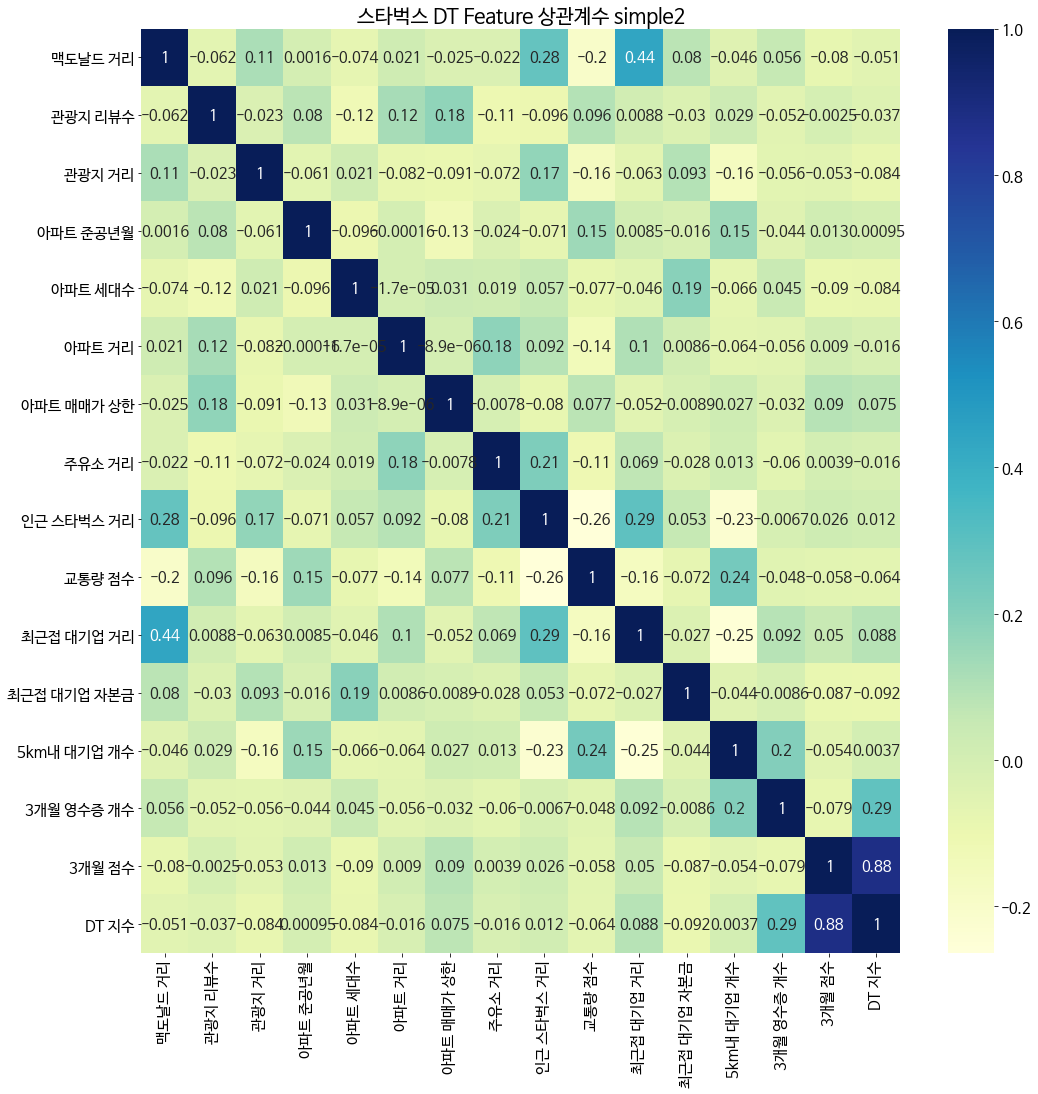

In [10]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(starbucks_feature4.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 simple2', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수_simplified2.png")

## EDA using t-sne

In [71]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(starbucks_feature4.drop('지점명', axis=1))

xs = transformed[:,0]
ys = transformed[:,1]

In [72]:
DT_median = starbucks_feature4['DT 지수'].median()
DT_classs = starbucks_feature4['DT 지수'].map(lambda x:1 if x > DT_median else 0)

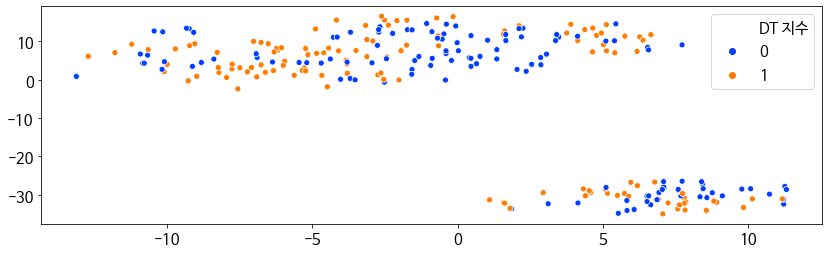

In [73]:
palette = sns.color_palette("bright", len(DT_classs.unique()))
sns.scatterplot(xs, ys, hue=DT_classs, legend='full', palette=palette)

## clustering using DBSCAN

In [75]:
# create model and prediction
model = DBSCAN(min_samples=10)
predict = pd.DataFrame(model.fit_predict(starbucks_feature4.drop('지점명', axis=1)))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([starbucks_feature4, predict],axis=1)
r.predict.unique()

array([ 0, -1,  1])

### visualization using t-sne 

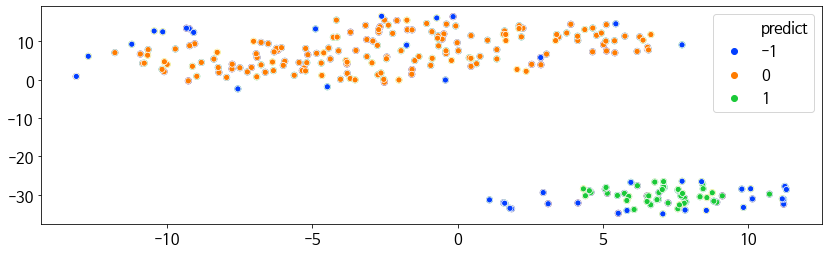

In [78]:
plt.scatter(xs,ys,c=list(r.index), )
palette = sns.color_palette("bright", len(r.predict.unique()))
sns.scatterplot(xs, ys, hue=predict['predict'], legend='full', palette=palette)
# plt.show()

## clustering using K-means

### 최적의 클러스터 개수

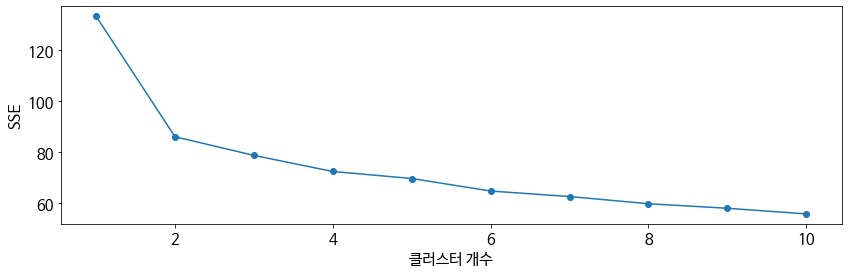

In [79]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
   
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

elbow(starbucks_feature4.drop('지점명', axis=1))

## k =2

In [90]:
clustering_num = 2
kmeans = KMeans(clustering_num).fit_predict(starbucks_feature4.drop('지점명', axis=1))
predict_kmeans = pd.DataFrame(kmeans, columns = ['predict'])
r2 = pd.concat([starbucks_feature4, predict_kmeans],axis=1)

### visualization using t-sne

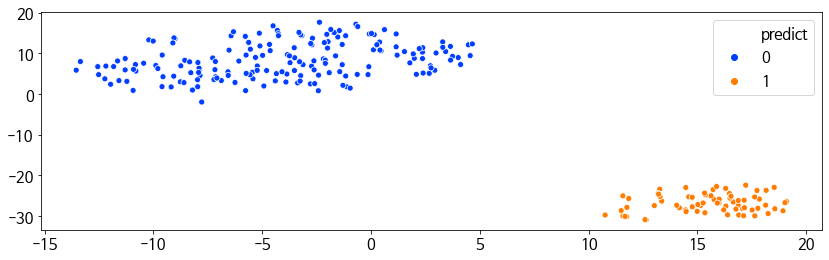

In [91]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(r2.drop('지점명', axis=1))
xs = transformed[:,0]
ys = transformed[:,1]
palette = sns.color_palette("bright", clustering_num)
sns.scatterplot(xs, ys, hue=predict_kmeans['predict'], legend='full', palette=palette)

### 군집 class와 각 feature간 상관 관계 분석

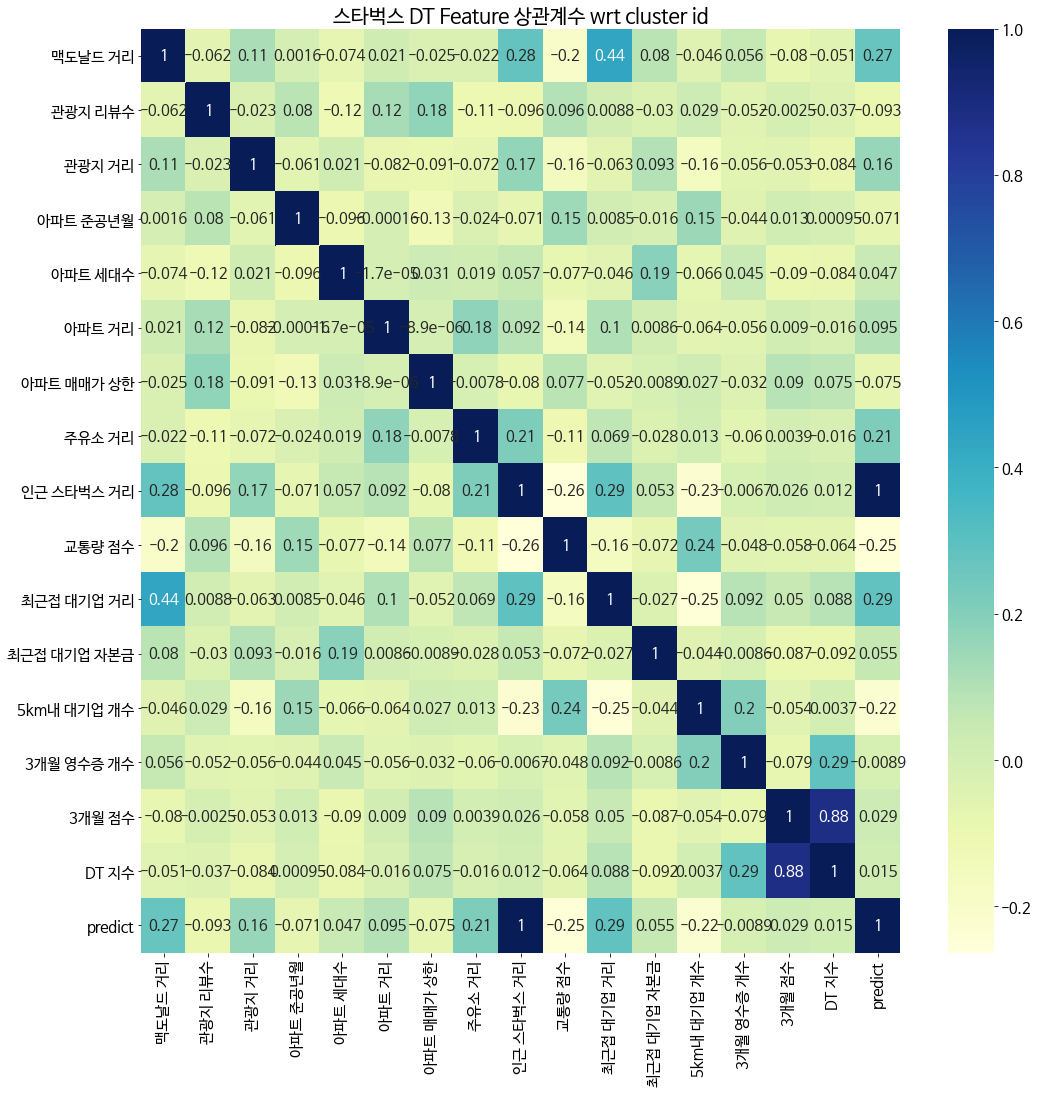

In [92]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(r2.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 wrt cluster id', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수 cluster num2.png")

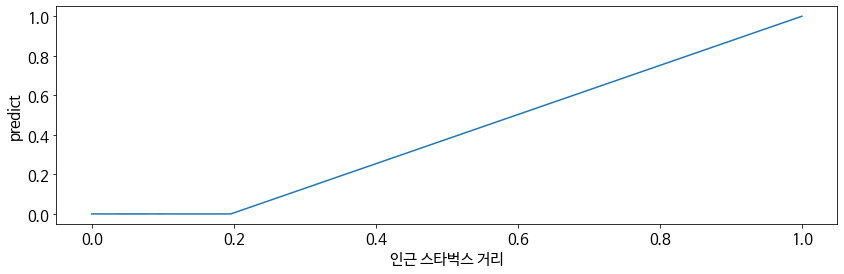

In [93]:
sns.lineplot(r2['인근 스타벅스 거리'], r2['predict'])

## k = 3

In [80]:
clustering_num = 3
kmeans = KMeans(clustering_num).fit_predict(starbucks_feature4.drop('지점명', axis=1))

In [81]:
predict_kmeans = pd.DataFrame(kmeans, columns = ['predict'])
r2 = pd.concat([starbucks_feature4, predict_kmeans],axis=1)

### visualization using t-sne

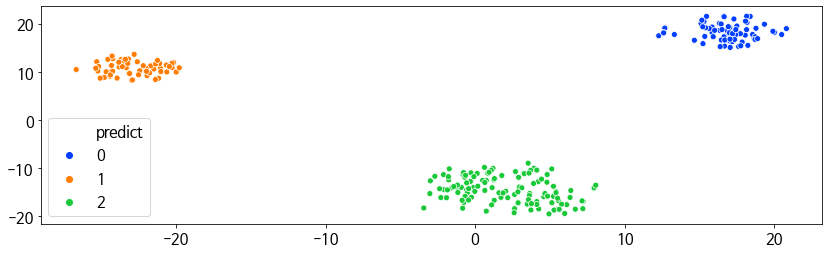

In [82]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(r2.drop('지점명', axis=1))
xs = transformed[:,0]
ys = transformed[:,1]
palette = sns.color_palette("bright", clustering_num)
sns.scatterplot(xs, ys, hue=predict_kmeans['predict'], legend='full', palette=palette)

### 군집 class와 각 feature간 상관 관계 분석

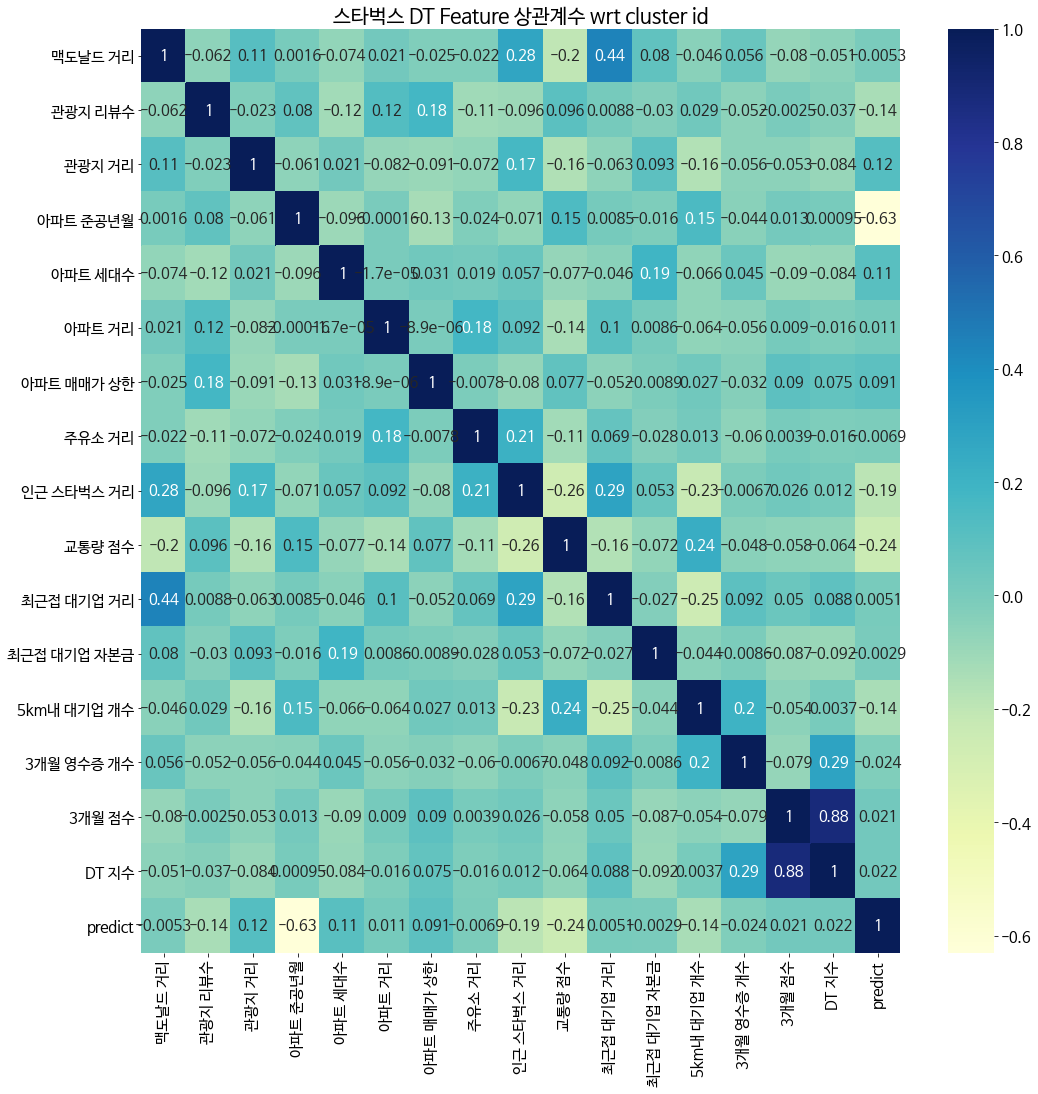

In [62]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(r2.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 wrt cluster id', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수 cluster id.png")